In [2]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

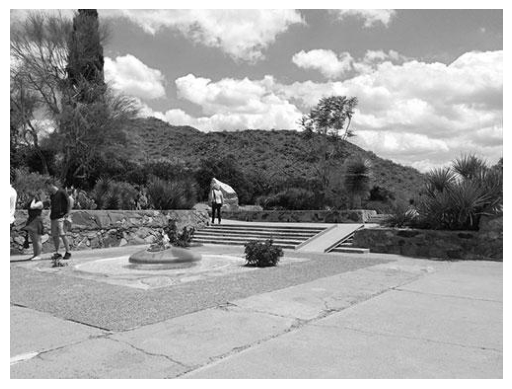

In [35]:
img_orig1 = plt.imread(IMG_DIR / "panorama1.jpg")
img_orig2 = plt.imread(IMG_DIR / "panorama2.jpg")
img_gray1 = cv2.cvtColor(img_orig1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_orig2, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray1, cmap="gray")
plt.axis("off")
plt.show()

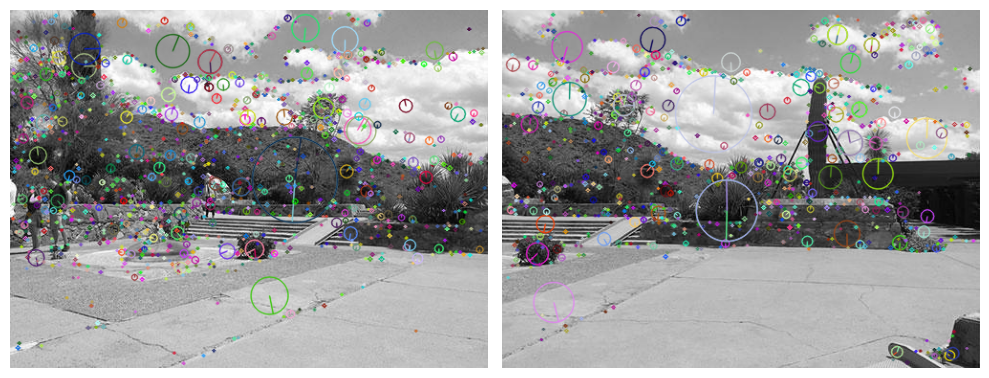

In [39]:
sift = cv2.SIFT_create()  # type: ignore
keypoints1 = sift.detect(img_gray1, None)
keypoints2 = sift.detect(img_gray2, None)
img_keypoints1 = cv2.drawKeypoints(
    img_gray1,
    keypoints1,
    img_orig1,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)
img_keypoints2 = cv2.drawKeypoints(
    img_gray2,
    keypoints2,
    img_orig2,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)
plt.figure(figsize=(10, 5), tight_layout=True)
plt.subplot(1, 2, 1)
plt.imshow(img_orig1)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_orig2)
plt.axis("off")
plt.show()

In [51]:
img_orig1 = plt.imread(IMG_DIR / "panorama1.jpg")
img_orig2 = plt.imread(IMG_DIR / "panorama2.jpg")

sift = cv2.SIFT_create()  # type: ignore
keypoints1, descriptors1 = sift.detectAndCompute(img_orig1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img_orig2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)


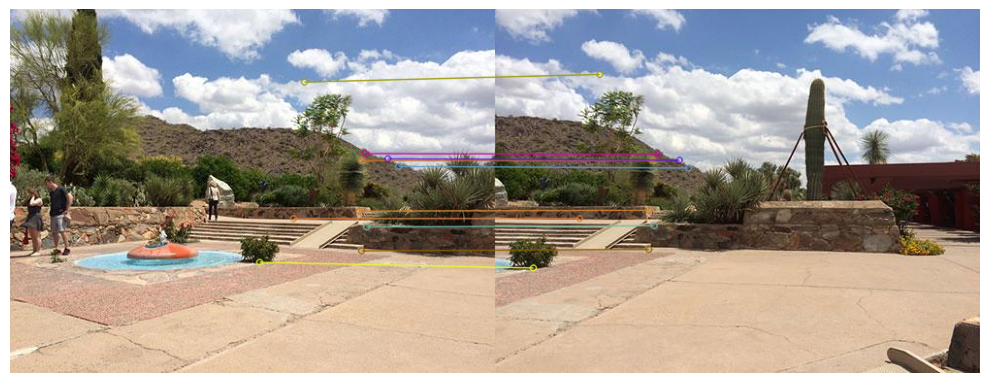

In [55]:
img_matches = cv2.drawMatches(
    img_orig1,
    keypoints1,
    img_orig2,
    keypoints2,
    matches[:10],
    img_orig2,
    flags=2,
)
plt.figure(figsize=(10, 5), tight_layout=True)
plt.imshow(img_matches)
plt.axis("off")
plt.show()